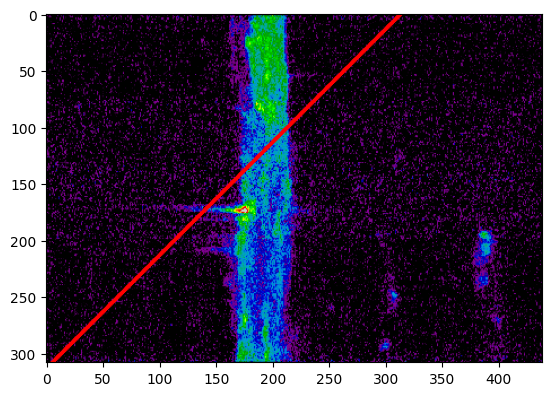

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/Users/naoj306/Desktop/277.52.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect edges using Canny edge detector
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply Hough Transform to find lines
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)  # parameters here might need adjustment

# Draw lines on the image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


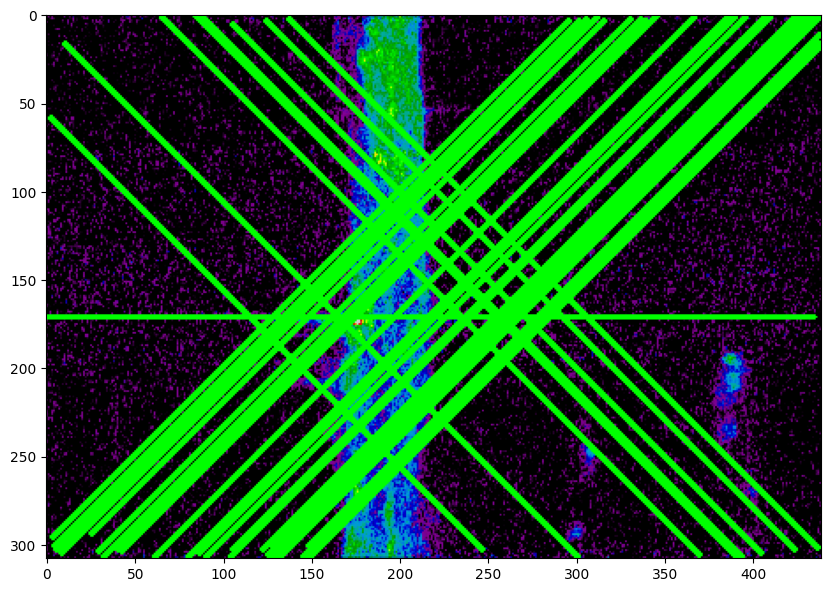

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image
image = cv2.imread('/Users/naoj306/Desktop/277.52.png', cv2.IMREAD_COLOR)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detector
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Use Hough Transform to find lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=170, minLineLength=10, maxLineGap=250)

# Draw lines on the image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


Line from (8, 305) to (312, 1) with bounding box: (8, 1) to (312, 305)
Line from (128, 301) to (429, 0) with bounding box: (128, 0) to (429, 301)


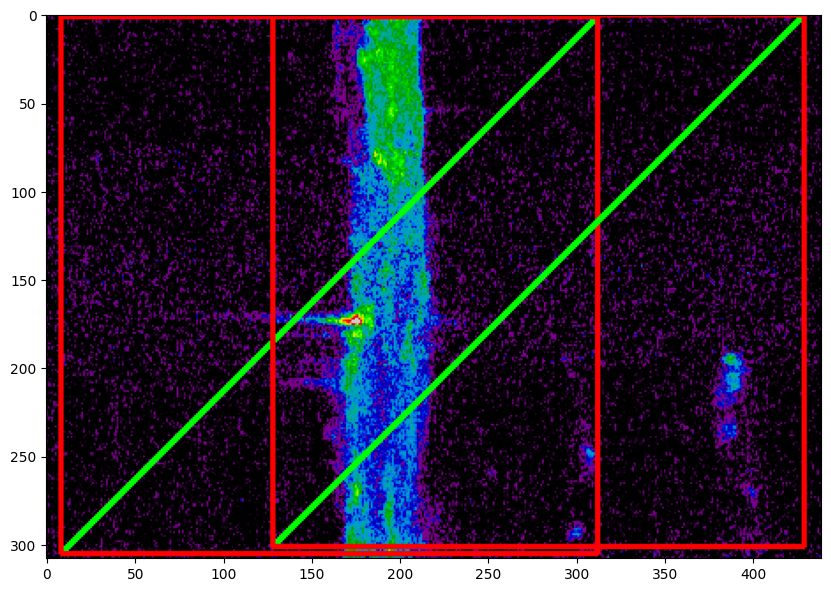

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image
image = cv2.imread('/Users/naoj306/Desktop/277.52.png', cv2.IMREAD_COLOR)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detector
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Use Hough Transform to find lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=197, minLineLength=100, maxLineGap=500)

# Draw lines and bounding boxes on the image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Calculate bounding box coordinates
        top_left_x = min(x1, x2)
        top_left_y = min(y1, y2)
        bottom_right_x = max(x1, x2)
        bottom_right_y = max(y1, y2)

        # Draw the bounding box
        cv2.rectangle(image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 0, 255), 2)
        
        # Print location information
        print(f"Line from ({x1}, {y1}) to ({x2}, {y2}) with bounding box: ({top_left_x}, {top_left_y}) to ({bottom_right_x}, {bottom_right_y})")

# Display the result
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


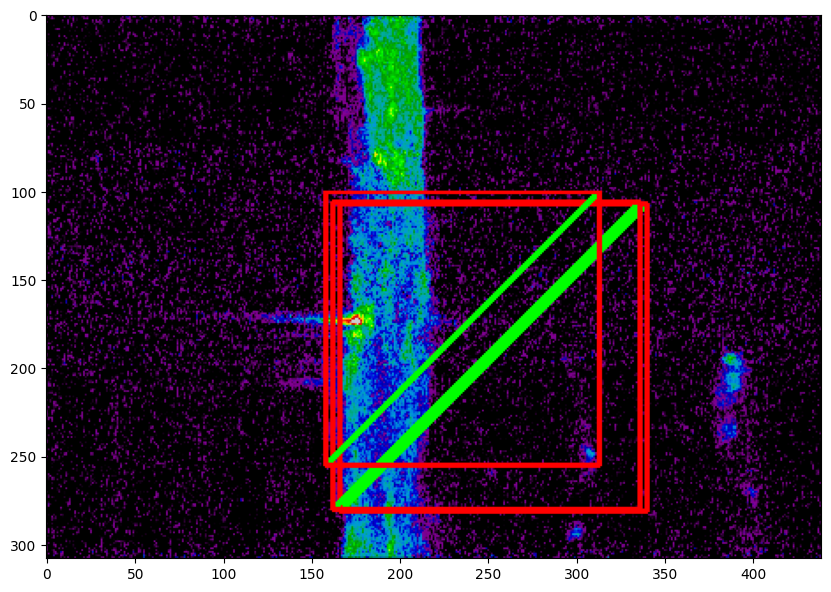

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image
image = cv2.imread('/Users/naoj306/Desktop/277.52.png', cv2.IMREAD_COLOR)

# Define the ROI more precisely around the expected feature location
x, y, w, h = 150, 100, 200, 200  # Adjust these coordinates as needed
roi_color = image[y:y+h, x:x+w]

# Convert ROI to grayscale for edge detection
gray_roi = cv2.cvtColor(roi_color, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detector on the grayscale ROI
edges = cv2.Canny(gray_roi, 100, 200, apertureSize=3)  # Adjust edge detection parameters as needed

# Use Hough Transform to find lines in the edges
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=500)

# Draw lines and bounding boxes on the ROI
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(roi_color, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.rectangle(roi_color, (min(x1, x2), min(y1, y2)), (max(x1, x2), max(y1, y2)), (0, 0, 255), 2)

# Place the processed ROI back into the original image
image[y:y+h, x:x+w] = roi_color

# Display the result
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
